In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nba-players-data/all_seasons.csv


In [2]:
import matplotlib.pyplot as plt


First I load my data as NBA DataFrame then I'm checking data if there are some missing values, shape of my dataframe and finally which data types are my variables 

In [3]:
NBA = pd.DataFrame(pd.read_csv('/kaggle/input/nba-players-data/all_seasons.csv'))
print(NBA.shape)
print(NBA.isnull().sum()) #checking the shape of dataframe
print(NBA.dtypes) #checking if there is some variables that I have to change their data type

(12844, 22)
Unnamed: 0              0
player_name             0
team_abbreviation       0
age                     0
player_height           0
player_weight           0
college              1854
country                 0
draft_year              0
draft_round             0
draft_number            0
gp                      0
pts                     0
reb                     0
ast                     0
net_rating              0
oreb_pct                0
dreb_pct                0
usg_pct                 0
ts_pct                  0
ast_pct                 0
season                  0
dtype: int64
Unnamed: 0             int64
player_name           object
team_abbreviation     object
age                  float64
player_height        float64
player_weight        float64
college               object
country               object
draft_year            object
draft_round           object
draft_number          object
gp                     int64
pts                  float64
reb                  float

I'm going to change draft_number to numeric type for purpose of Sorting them later for my observations

In [4]:
def undraft_number(draft_number):
    undraft_number_dict = {
        'Undrafted': '61',
        '0': '61',
    }
    try:
        return undraft_number_dict[draft_number]
    except:
        return draft_number
NBA.draft_number = NBA.draft_number.apply(undraft_number) #cleaning the draft_number setting number to 61 if player was undrafted
NBA['draft_number'] = NBA.draft_number.astype('int64') # changing draft_number to numeric

My next move is to rename columns for better understanding which abbreviation stands for which statistic. Adding new columns season_start and season_end for easier subsetting later on.

In [5]:
NBA.rename(columns = {'player_height':'height', 'player_weight':'weight', 
                     'pts':'avg_pts', 'reb':'avg_reb', 'ast':'avg_ast','gp':'games_played'}, inplace = True) #renaming columns because they are averages of player's pts,reb,assists
NBA['height_in_feets'] = (NBA['height'] / 30.28).round(1)
NBA['season_start'] = NBA['season'].str[:4]
NBA['season_end'] =  NBA['season'].str[:2] + NBA['season'].str[5:] #adding columns for easier subseting

Then I check and make a plot about how height affects position in draft 

In [6]:
draft_and_height = NBA[['height','draft_number']] \
    .groupby('draft_number') \
    .mean()\
    .sort_values('draft_number',ascending=True)\
    .head(20)\
    .round(2)
    
draft_and_height.index.name = 'Position in Draft'    
print(draft_and_height)

                   height
Position in Draft        
1                  205.98
2                  204.19
3                  201.97
4                  202.19
5                  201.00
6                  203.71
7                  200.73
8                  201.32
9                  203.24
10                 200.50
11                 202.19
12                 203.03
13                 200.46
14                 200.87
15                 202.76
16                 200.42
17                 202.41
18                 201.26
19                 201.11
20                 201.45


We can clearly see that teams tend to draft taller players at first 3 position of the draft.

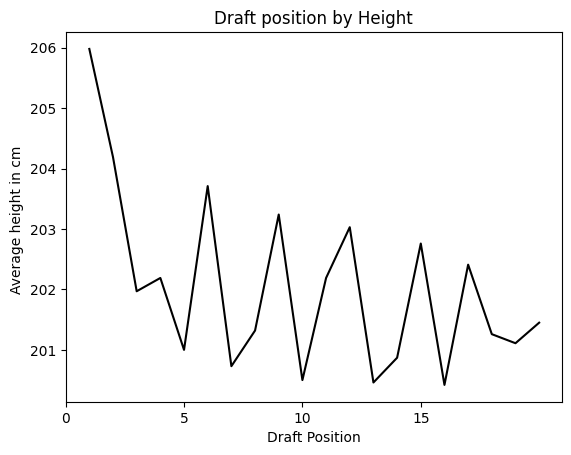

In [7]:
plt.plot(draft_and_height['height'],color = 'black')
plt.xlabel("Draft Position")
plt.ylabel("Average height in cm ")
plt.title('Draft position by Height')
plt.xticks(ticks=range(0, len(draft_and_height), 5))
plt.show()

Nextly I check whether the average height of the player in the NBA changes across the seasons

In [8]:
height_across_seasons = NBA[['height','season']]\
     .groupby('season')\
     .mean()\
     .sort_values('season',ascending=True)\
     .round(2)

print(height_across_seasons)

         height
season         
1996-97  200.99
1997-98  200.62
1998-99  200.90
1999-00  200.92
2000-01  200.75
2001-02  201.02
2002-03  201.52
2003-04  201.32
2004-05  201.25
2005-06  200.92
2006-07  200.70
2007-08  200.85
2008-09  201.20
2009-10  200.87
2010-11  201.22
2011-12  200.83
2012-13  200.77
2013-14  200.77
2014-15  200.84
2015-16  200.95
2016-17  200.92
2017-18  200.46
2018-19  200.54
2019-20  198.94
2020-21  198.91
2021-22  198.35
2022-23  199.27


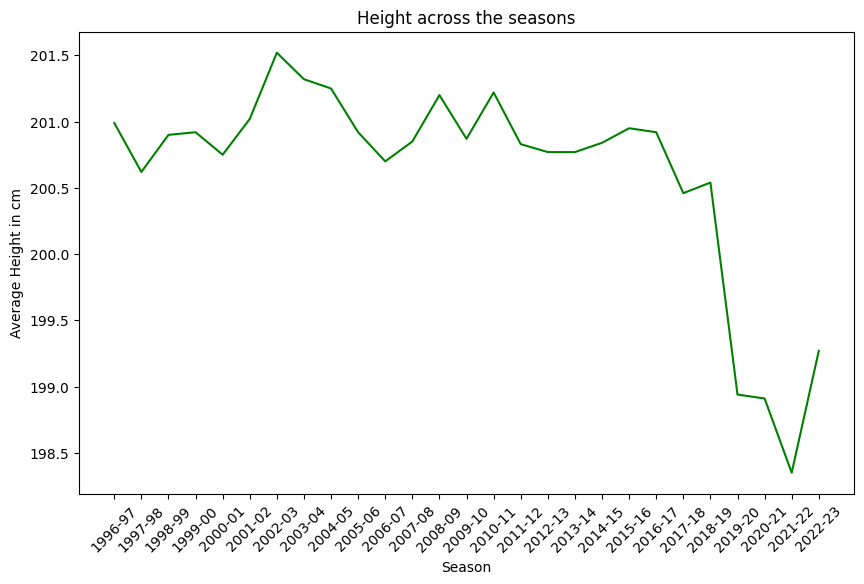

In [9]:
plt.figure(figsize=(10,6))
plt.plot(height_across_seasons,color = 'green')
plt.xlabel('Season')
plt.ylabel('Average Height in cm')
plt.title('Height across the seasons')
plt.xticks(rotation = 45)
plt.show()

We can notice the tendency that average height gets slightly lower over the years.
Now I want to check the scoring correlation between big players (above 6"8) and small players (6"8 and below) to see if 'Bigs' are still relevant in today's league. 

In [10]:
small_players = NBA[NBA['height'] <= 207.2]
big_players = NBA[NBA['height'] > 207.2]
big_players_pts_by_season = big_players[['avg_pts','season']] \
     .groupby('season')\
     .mean()\
     .sort_values('season',ascending=True)\
     .round(1)\
     .rename(columns={'avg_pts':'BIG_avg_pts'})


big_players_pts_by_season


,BIG_avg_pts
season,
1996-97,7.5
1997-98,7.9
1998-99,6.9
1999-00,7.4
2000-01,6.8
2001-02,6.7
2002-03,6.8
2003-04,7.0
2004-05,7.2


In [11]:
small_players_pts_by_season = small_players[['avg_pts','season']] \
     .groupby('season')\
     .mean()\
     .sort_values('season',ascending=True)\
     .round(1)\
     .rename(columns={'avg_pts':'SMALL_avg_pts'})

small_players_pts_by_season

,SMALL_avg_pts
season,
1996-97,8.2
1997-98,7.9
1998-99,7.5
1999-00,8.2
2000-01,8.2
2001-02,8.6
2002-03,8.3
2003-04,8.1
2004-05,8.5


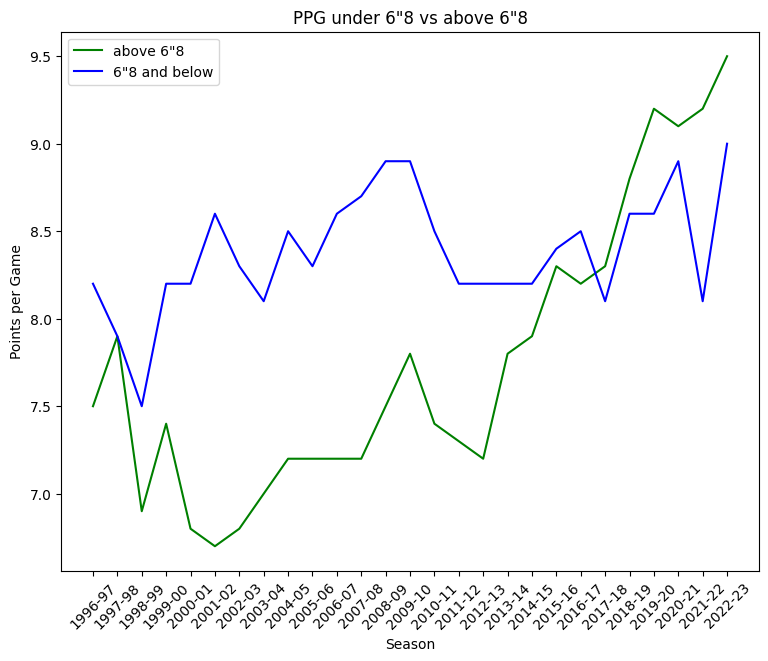

In [12]:
plt.figure(figsize=(9,7))
plt.plot(big_players_pts_by_season['BIG_avg_pts'],color = 'green',label='above 6"8')
plt.plot(small_players_pts_by_season['SMALL_avg_pts'],color = 'blue',label='6"8 and below')
plt.ylabel('Points per Game')
plt.xlabel('Season')
plt.title('PPG under 6"8 vs above 6"8')
plt.legend()
plt.xticks(rotation = 45)
plt.show()

We can observe tendency that occurs here - players tends to score points during their games, and secondly we can that 'BIG' guys are doing just fine in today's NBA even better than before!

Now it's time to really see if the 'BIGS' are having more impact on winning than the smaller guys.
To do that we have subset the players that played minimum 80% of games during the season and take their net rating. Below I did comparison beetween Top 10 Big and small player net rating during those seasons.

In [13]:
valid_small_players = small_players[small_players['games_played'] >= 65] #subseting players that played 80% games 
valid_big_players = big_players[big_players['games_played'] >= 65]

top10_net_rating_small_players = valid_small_players[['player_name','height','net_rating','season']]\
       .sort_values('net_rating',ascending=False)\
       .head(10)

print(top10_net_rating_small_players)

         player_name  height  net_rating   season
8636  Draymond Green  200.66        18.9  2015-16
8930   Stephen Curry  190.50        18.3  2015-16
9257   Stephen Curry  190.50        17.2  2016-17
8303   Stephen Curry  190.50        17.0  2014-15
3597   Manu Ginobili  198.12        16.6  2004-05
8365  Draymond Green  200.66        16.5  2014-15
9519  Draymond Green  200.66        15.9  2016-17
8517   Klay Thompson  200.66        15.8  2014-15
8960   Klay Thompson  200.66        15.7  2015-16
5387    LeBron James  203.20        14.7  2008-09


In [14]:
top10_net_rating_big_players = valid_big_players[['player_name','height','net_rating','season']]\
        .sort_values('net_rating',ascending=False)\
        .head(10)

print(top10_net_rating_big_players)

              player_name  height  net_rating   season
9467         JaVale McGee  213.36        18.7  2016-17
5207        Kevin Garnett  210.82        17.0  2007-08
3638           Tim Duncan  210.82        16.7  2004-05
8282         Andrew Bogut  213.36        16.6  2014-15
17          Greg Ostertag  218.44        15.9  1996-97
11557         Rudy Gobert  215.90        15.9  2020-21
9228        Zaza Pachulia  210.82        15.8  2016-17
5385           Lamar Odom  208.28        14.8  2008-09
5575   Zydrunas Ilgauskas  220.98        14.8  2008-09
5211     Kendrick Perkins  208.28        14.6  2007-08


The net rating of TOP 10 best players in that category from 'Smalls' and 'Bigs' does not differ too much, in most cases the difference does not exceed values of 1. To find if Bigs or Smalls are really more impactful we have to see the average production of net ratings by 'Smalls' and 'Bigs'.

In [15]:
net_rating_big = valid_big_players[['season','net_rating']].groupby('season')\
     .mean()\
     .sort_values('season',ascending=True)\
     .round(1)

net_rating_big


,net_rating
season,
1996-97,1.0
1997-98,0.4
1999-00,0.7
2000-01,1.6
2001-02,1.0
2002-03,0.4
2003-04,1.1
2004-05,0.3
2005-06,0.6


In [16]:
net_rating_small = valid_small_players[['season','net_rating']].groupby('season')\
     .mean()\
     .sort_values('season',ascending=True)\
     .round(1)

net_rating_small

,net_rating
season,
1996-97,0.1
1997-98,0.1
1999-00,0.6
2000-01,-0.1
2001-02,-0.0
2002-03,0.0
2003-04,0.2
2004-05,0.3
2005-06,-0.4


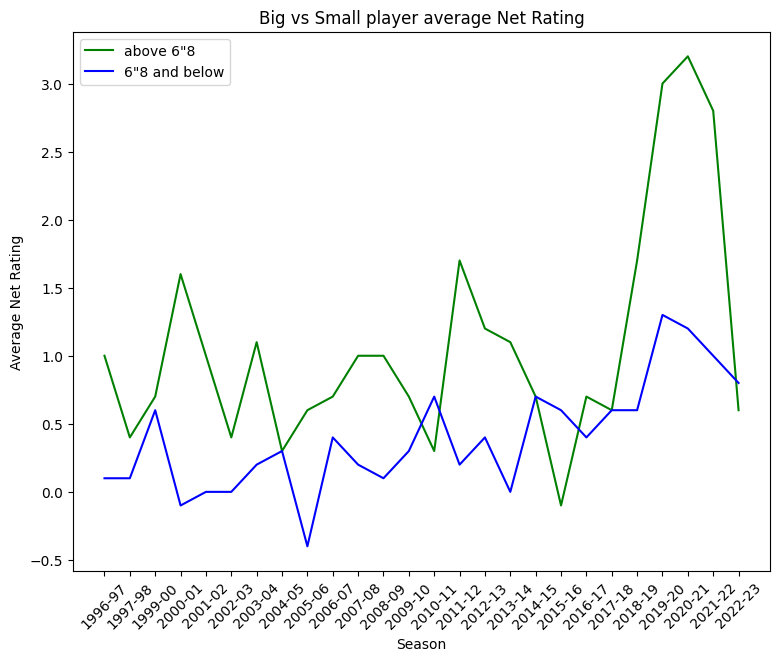

In [17]:
plt.figure(figsize=(9,7))
plt.plot(net_rating_big['net_rating'],color='green',label='above 6"8')
plt.plot(net_rating_small['net_rating'],color='blue',label='6"8 and below')
plt.xlabel('Season')
plt.ylabel('Average Net Rating')
plt.title('Big vs Small player average Net Rating')
plt.legend()
plt.xticks(rotation = 45)
plt.show()

This plot clearly tells us that big are impactful on the court across the years in even today's NBA.

In conclusion we can see couple of things. Firstly that we can observe that  indeed height impacts your chance of getting into NBA, but the average height of the players is getting slowly lower. It may be caused by the fact that players that are smaller tends to score more points and are more versatile than the 'Bigs' however in the last couple of season we can that 'Bigs' are starting do dominate the game. Secondly we can see that in those seasons Bigs were almost always more impactful than the smaller guys. In my opinion it's safe to say that Bigs are still relevant in today's NBA and being taller makes you more likely to get into NBA.